In [1]:
%matplotlib inline

In [2]:
# Load an FVCOM model output and plot a surface.
from PyFVCOM.read_results import FileReader
from PyFVCOM.plot import Plotter
from cmocean import cm
import matplotlib.pyplot as plt

fvcom = FileReader('sample.nc', dims={'time': [0, 200]}, variables=['zeta'])

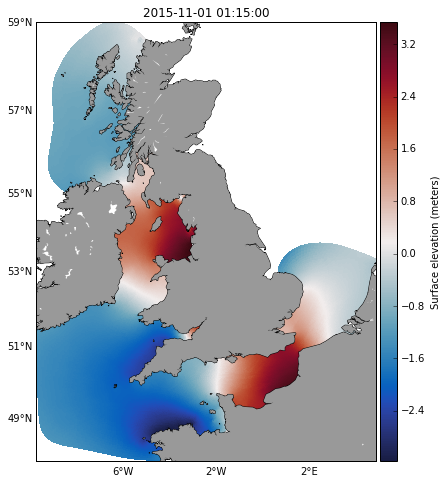

In [3]:
# Make a plot of the surface elevation.
plot = Plotter(fvcom, 
               figsize=(20, 20),
               res='i',
               tick_inc=(4, 2), 
               cb_label='Surface elevation ({})'.format(fvcom.ds.variables['zeta'].units),
               cmap=cm.balance)
plot.plot_field(field=fvcom.data.zeta[5, :])
plot.axes.set_title(fvcom.time.datetime[5].strftime('%Y-%m-%d %H:%M:%S'))

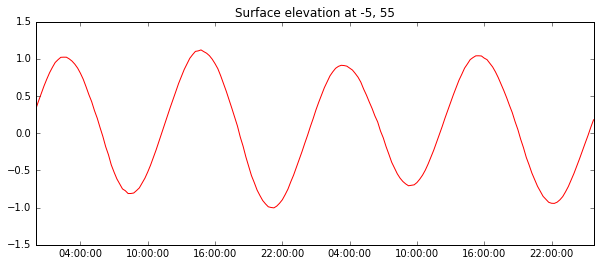

In [4]:
# Do a time series at a specific location.
gauge = (-5, 55)  # a sample (lon, lat) position
index = fvcom.closest_node(gauge)
fig = plt.figure(figsize(10, 4))
ax = fig.add_subplot(111)
ax.plot(fvcom.time.datetime, fvcom.data.zeta[:, index], 'r')
ax.set_title('Surface elevation at {}, {}'.format(*gauge))